Project Overview:
This project involves conducting exploratory data analysis and hypothesis testing to understand the factors that contribute to customer acquisition. The dataset includes information related to the marketing mix, including product, price, place, and promotion.

Key Steps:
- Data Import and Initial Investigation: Import the dataset and verify the correctness of variables like Dt_Customer and Income.
- Missing Value Imputation: Clean the data and impute missing values in the Income variable based on similar education and marital status.
- Creation of Additional Variables: Calculate total number of children, age, and total spending.
- Exploratory Data Analysis: Use box plots and histograms to understand distributions and identify outliers.
- Encoding of Categorical Variables: Apply ordinal and one-hot encoding to handle different categorical variables.
- Correlation Analysis: Create a heatmap to visualize correlations between variables.
- Hypothesis Testing: Test hypotheses related to customer preferences, distribution channels, and country performance.
- Visualization and Analysis: Use appropriate visualizations to analyze product performance, age patterns, campaign acceptance, customer complaints, and spending      patterns.

In [241]:
# importing all the need libaries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


df = pd.read_csv("marketing_data.csv", index_col="ID")   # data importing

df.head(20)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,0,336,130,...,5,2,0,0,0,0,0,1,0,SP
4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,0,769,80,...,7,6,1,0,0,0,0,1,0,GER
1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,0,78,0,...,3,5,0,0,0,0,0,0,0,SP
4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,0,384,0,...,9,4,0,0,0,0,0,0,0,US


In [242]:
df.describe()

,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 1826 to 4070
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year_Birth           2240 non-null   int64 
 1   Education            2240 non-null   object
 2   Marital_Status       2240 non-null   object
 3    Income              2216 non-null   object
 4   Kidhome              2240 non-null   int64 
 5   Teenhome             2240 non-null   int64 
 6   Dt_Customer          2240 non-null   object
 7   Recency              2240 non-null   int64 
 8   MntWines             2240 non-null   int64 
 9   MntFruits            2240 non-null   int64 
 10  MntMeatProducts      2240 non-null   int64 
 11  MntFishProducts      2240 non-null   int64 
 12  MntSweetProducts     2240 non-null   int64 
 13  MntGoldProds         2240 non-null   int64 
 14  NumDealsPurchases    2240 non-null   int64 
 15  NumWebPurchases      2240 non-null   int64 
 16  NumCatal

In [244]:
df.shape

(2240, 27)

In [245]:
df.columns=df.columns.str.replace(" ","") # deleting all the empty spaces

In [246]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,18,...,11,4,0,0,0,0,0,0,0,US
5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,2,...,5,8,0,0,0,0,0,0,0,SP


In [247]:
df['Income'] = df['Income'].str.replace(',', '').str.replace('$', '').astype(float)  # deleting all the '$' and ',' to work on the income column
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,6,1,0,0,0,0,0,1,0,SP
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,5,2,0,0,0,0,0,0,0,US
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,2,7,1,0,0,0,0,1,0,SP


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 1826 to 4070
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [249]:
df.Dt_Customer

ID
1826      6/16/14
1         6/15/14
10476     5/13/14
1386      5/11/14
5371       4/8/14
           ...   
10142      3/7/13
5263      1/22/13
22        12/3/12
528      11/29/12
4070       9/1/12
Name: Dt_Customer, Length: 2240, dtype: object

In [250]:
df.isna().sum() # showing the null values on each column

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [251]:
df["Income"]=df.groupby(['Marital_Status','Education'])['Income'].transform(lambda x:x.fillna(x.mean())) # filling all the null values on the specified columns by the average of each group

In [252]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [253]:
df["totalSpending"] = df.MntFruits + df.MntMeatProducts + df.MntFishProducts + df.MntSweetProducts + df.MntGoldProds # calculate the total spending
df["totalPurchases"] = df.NumDealsPurchases + df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases  # calculate the total purchases
df["totalChildern"] = df.Kidhome + df.Teenhome  # calculate the total num of Childern

df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,0,0,0,0,1,0,SP,1001,15,0
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,0,0,0,1,1,0,CA,113,18,0
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,0,0,0,0,0,0,US,117,11,1
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,0,0,0,0,0,0,AUS,1,4,2
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,0,0,0,0,1,0,SP,85,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,...,0,0,0,0,0,0,US,317,20,1
5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,0,0,0,0,0,0,SP,50,5,1
22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,...,0,0,0,0,0,0,SP,124,14,1


In [254]:
df["age"] = 2023 - df.Year_Birth # adding age columns

In [255]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,0,0,0,1,0,SP,1001,15,0,53
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,0,0,1,1,0,CA,113,18,0,62
10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,0,0,0,0,0,US,117,11,1,65
1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,...,0,0,0,0,0,AUS,1,4,2,56
5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,...,0,0,0,1,0,SP,85,8,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,18,...,0,0,0,0,0,US,317,20,1,47
5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,0,0,0,0,0,SP,50,5,1,46
22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,2,...,0,0,0,0,0,SP,124,14,1,47


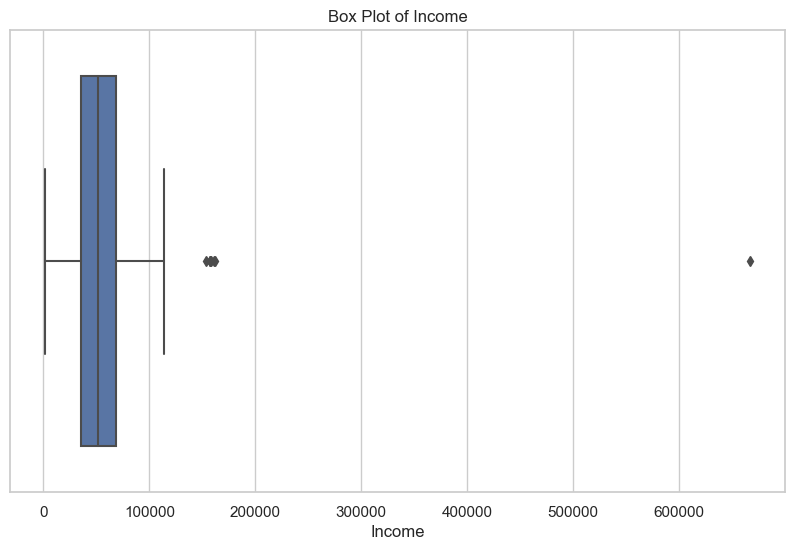

In [256]:
sns.set(style="whitegrid")    # showing the outliers
plt.figure(figsize=(10, 6))

sns.boxplot(data=df, x="Income")
plt.title("Box Plot of Income")
plt.show()

In [257]:
df.loc[df.Income > 200000]  # showing the outliers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
9432,1977,Graduation,Together,666666.0,1,0,6/2/13,23,9,14,...,0,0,0,0,0,SA,53,11,1,46


In [258]:
dropp = df[df.Income > 200000].index   # droping the outliers
df.drop(dropp, inplace = True)

df.loc[df.Income > 200000]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,


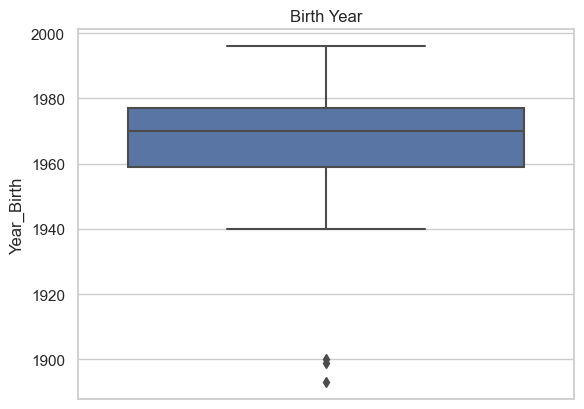

In [259]:
sns.boxplot(data=df, y='Year_Birth')             # showing the outliers
plt.title("Birth Year")
plt.show()

In [260]:
df.loc[df.Year_Birth < 1920]   # showing the outliers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
11004,1893,2n Cycle,Single,60182.0,0,1,5/17/14,23,8,0,...,0,0,0,0,0,SA,14,4,1,130
1150,1899,PhD,Together,83532.0,0,0,9/26/13,36,755,144,...,1,0,0,0,0,SP,1098,15,0,124
7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/13,99,15,6,...,0,0,0,0,1,IND,50,6,1,123


In [261]:
dropp = df[df.Year_Birth < 1920].index   # droping the outliers
df.drop(dropp, inplace = True)

df.loc[df.Year_Birth < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,


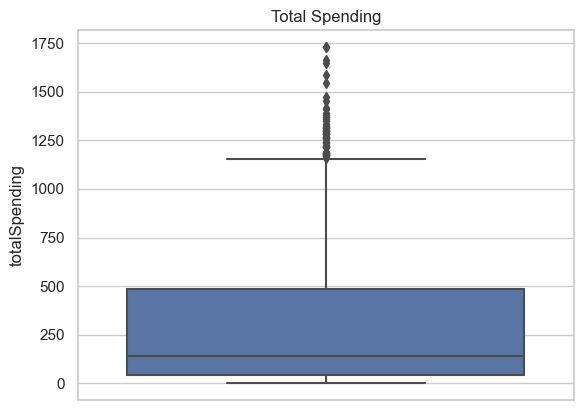

In [262]:
sns.boxplot(data=df, y='totalSpending')      # showing the outliers
plt.title("Total Spending")
plt.show()

In [263]:
df.loc[df.totalSpending > 1150]    # showing the outliers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
9264,1986,Graduation,Married,79529.000000,0,0,4/27/14,1,423,42,...,0,0,0,0,0,CA,1215,22,0,37
1619,1956,Graduation,Married,90369.000000,0,0,4/28/14,2,292,51,...,0,0,0,1,0,SP,1296,17,0,67
7233,1972,Graduation,Married,69209.000000,0,0,9/17/12,4,496,32,...,0,1,0,0,0,CA,1286,16,0,51
5331,1977,Graduation,Married,74985.000000,0,0,9/11/12,8,587,51,...,0,0,0,0,0,GER,1282,17,0,46
4931,1977,Graduation,Together,157146.000000,0,0,4/29/13,13,1,0,...,0,0,0,0,0,SA,1729,28,0,46
3698,1983,Graduation,Together,78687.000000,0,0,8/9/12,13,817,185,...,1,0,0,1,0,SP,1313,19,0,40
1577,1946,Graduation,Married,78569.000000,0,0,2/19/14,14,558,79,...,1,0,0,1,0,SP,1178,15,0,77
6072,1970,Master,Single,75345.000000,0,0,2/2/13,16,918,57,...,0,1,0,1,0,SP,1169,20,0,53
8643,1971,Graduation,Together,69930.000000,0,0,5/26/13,21,252,98,...,0,0,0,0,0,IND,1410,22,0,52


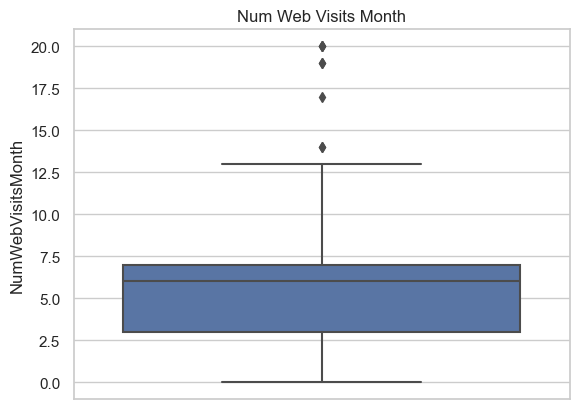

In [264]:
sns.boxplot(data=df, y='NumWebVisitsMonth')       # showing the outliers
plt.title("Num Web Visits Month") 
plt.show()

In [265]:
df.loc[df.NumWebVisitsMonth> 13]   

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
4246,1982,Master,Single,6560.0,0,0,12/12/13,2,67,11,...,0,0,0,0,0,SP,306,2,0,41
3955,1965,Graduation,Divorced,4861.0,0,0,6/22/14,20,2,1,...,0,0,0,0,0,SA,4,0,0,58
9931,1963,PhD,Married,4023.0,1,1,6/23/14,29,5,0,...,0,0,0,0,0,SP,4,15,2,60
11110,1973,Graduation,Single,3502.0,1,0,4/13/13,56,2,1,...,0,0,0,0,0,IND,3,0,1,50
10749,1991,Graduation,Single,8028.0,0,0,9/18/12,62,73,18,...,0,0,0,0,0,SP,105,16,0,32
6862,1971,Graduation,Divorced,1730.0,0,0,5/18/14,65,1,1,...,0,0,0,0,0,SP,7,15,0,52
5899,1950,PhD,Together,5648.0,1,1,3/13/14,68,28,0,...,0,0,0,0,0,US,21,2,2,73
4303,1957,PhD,Together,6835.0,0,1,12/8/12,76,107,2,...,0,0,0,0,0,CA,30,1,1,66


In [266]:
dropp = df[df.NumWebVisitsMonth> 13].index   # droping the outliers
df.drop(dropp, inplace = True)

df.loc[df.NumWebVisitsMonth> 13]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,


In [267]:
pd.unique(df.Education) # knowing the unique values of education

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [268]:
enc = OrdinalEncoder()   # using the ordinal encoder for specificed columns
enc.fit(df[["Marital_Status"]])
df[["Marital_Status"]] = enc.transform(df[["Marital_Status"]])

In [269]:
ndf = pd.get_dummies(df, columns = ['Country'], prefix=['cou1'])  # using the get_dummies which is one hot encoder in pandas for specificed columns
ndf.replace({False: 0, True: 1}, inplace=True)
ndf

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,totalChildern,age,cou1_AUS,cou1_CA,cou1_GER,cou1_IND,cou1_ME,cou1_SA,cou1_SP,cou1_US
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,2.0,84835.0,0,0,6/16/14,0,189,104,...,0,53,0,0,0,0,0,0,1,0
1,1961,Graduation,4.0,57091.0,0,0,6/15/14,0,464,5,...,0,62,0,1,0,0,0,0,0,0
10476,1958,Graduation,3.0,67267.0,0,1,5/13/14,0,134,11,...,1,65,0,0,0,0,0,0,0,1
1386,1967,Graduation,5.0,32474.0,1,1,5/11/14,0,10,0,...,2,56,1,0,0,0,0,0,0,0
5371,1989,Graduation,4.0,21474.0,1,0,4/8/14,0,6,16,...,1,34,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,2.0,66476.0,0,1,3/7/13,99,372,18,...,1,47,0,0,0,0,0,0,0,1
5263,1977,2n Cycle,3.0,31056.0,1,0,1/22/13,99,5,10,...,1,46,0,0,0,0,0,0,1,0
22,1976,Graduation,2.0,46310.0,1,0,12/3/12,99,185,2,...,1,47,0,0,0,0,0,0,1,0


In [270]:
ndf = pd.get_dummies(df, columns = ['Education'], prefix=['cou1'])  # using the get_dummies which is one hot encoder in pandas for specificed columns
ndf.replace({False: 0, True: 1}, inplace=True)
ndf

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Country,totalSpending,totalPurchases,totalChildern,age,cou1_2n Cycle,cou1_Basic,cou1_Graduation,cou1_Master,cou1_PhD
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,2.0,84835.0,0,0,6/16/14,0,189,104,379,...,SP,1001,15,0,53,0,0,1,0,0
1,1961,4.0,57091.0,0,0,6/15/14,0,464,5,64,...,CA,113,18,0,62,0,0,1,0,0
10476,1958,3.0,67267.0,0,1,5/13/14,0,134,11,59,...,US,117,11,1,65,0,0,1,0,0
1386,1967,5.0,32474.0,1,1,5/11/14,0,10,0,1,...,AUS,1,4,2,56,0,0,1,0,0
5371,1989,4.0,21474.0,1,0,4/8/14,0,6,16,24,...,SP,85,8,1,34,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,2.0,66476.0,0,1,3/7/13,99,372,18,126,...,US,317,20,1,47,0,0,0,0,1
5263,1977,3.0,31056.0,1,0,1/22/13,99,5,10,13,...,SP,50,5,1,46,1,0,0,0,0
22,1976,2.0,46310.0,1,0,12/3/12,99,185,2,88,...,SP,124,14,1,47,0,0,1,0,0


<Axes: >

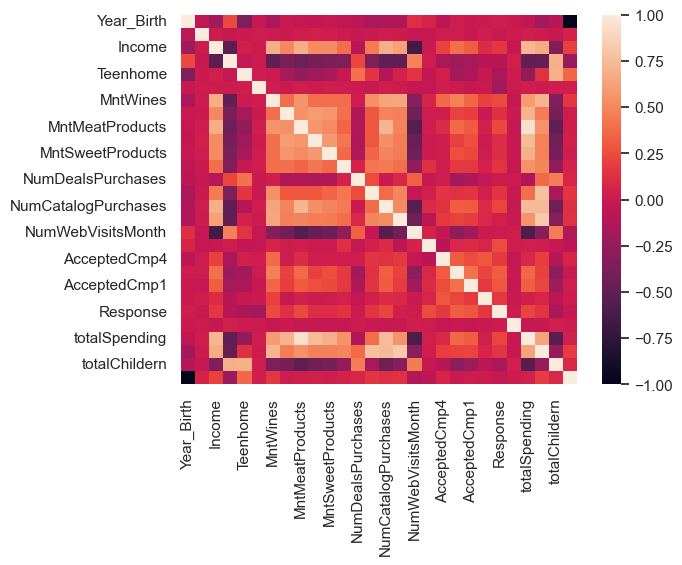

In [271]:
nc = df.select_dtypes(include=['number'])   # chossing only the columns which has number type

sns.heatmap(nc.corr())

Hypothesis Testing:
    o	Older people are not as tech-savvy and probably prefer shopping in-store.

In [272]:
t_stat, p_value = stats.ttest_ind(df[df['age'] >= 60]["NumStorePurchases"],   # examen the Hypothesis 
                                 df[df['age'] > 60]["NumWebPurchases"],
                                 alternative='greater')

t_stat, p_value

(11.899421534174241, 1.6759719792136147e-31)

o	Customers with kids probably have less time to visit a store and would prefer to shop online.

In [273]:
t_stat, p_value = stats.ttest_ind(df[df['totalChildern'] > 0]["NumStorePurchases"],     # examen the Hypothesis 
                                 df[df['totalChildern'] > 0]["NumWebPurchases"],
                                 alternative="greater")

t_stat, p_value

(11.890569663657033, 3.1037680616480944e-32)

o	Does the US fare significantly better than the rest of the world in terms of total purchases?

In [274]:
t_stat, p_value = stats.ttest_ind(df[df['Country'] == "US"]["totalPurchases"],     # examen the Hypothesis 
                                 df[df['Country'] != "US"]["totalPurchases"],
                                 alternative="greater")

t_stat, p_value

(1.9252228931327178, 0.02716437670265415)

As we see all the p_value have number which is less than 0, so we can see all the hypothesises are false.

In [275]:
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,totalSpending,totalPurchases,totalChildern,age
ID,,,,,,,,,,,,,,,,,,,,,
1826,1970,Graduation,2.0,84835.0,0,0,6/16/14,0,189,104,...,0,0,0,1,0,SP,1001,15,0,53
1,1961,Graduation,4.0,57091.0,0,0,6/15/14,0,464,5,...,0,0,1,1,0,CA,113,18,0,62
10476,1958,Graduation,3.0,67267.0,0,1,5/13/14,0,134,11,...,0,0,0,0,0,US,117,11,1,65
1386,1967,Graduation,5.0,32474.0,1,1,5/11/14,0,10,0,...,0,0,0,0,0,AUS,1,4,2,56
5371,1989,Graduation,4.0,21474.0,1,0,4/8/14,0,6,16,...,0,0,0,1,0,SP,85,8,1,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10142,1976,PhD,2.0,66476.0,0,1,3/7/13,99,372,18,...,0,0,0,0,0,US,317,20,1,47
5263,1977,2n Cycle,3.0,31056.0,1,0,1/22/13,99,5,10,...,0,0,0,0,0,SP,50,5,1,46
22,1976,Graduation,2.0,46310.0,1,0,12/3/12,99,185,2,...,0,0,0,0,0,SP,124,14,1,47


In [276]:
total_rev = df.MntWines.sum(), df.MntFruits.sum(), df.MntMeatProducts.sum(), df.MntFishProducts.sum(), df.MntSweetProducts.sum(), df.MntGoldProds.sum() # assigning

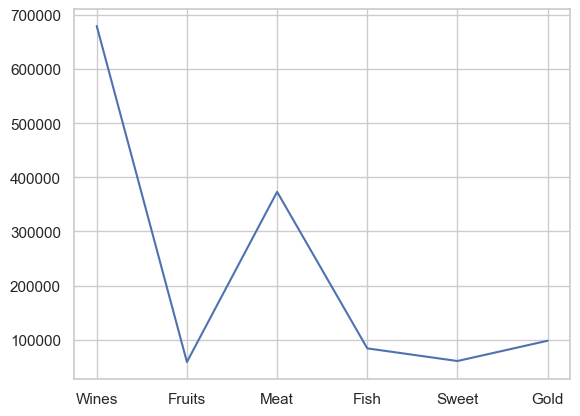

In [277]:
cate = ["Wines", "Fruits", "Meat", "Fish", "Sweet", "Gold"]    # ploting the total rev for each category
plt.plot(cate,total_rev)
plt.show()

We can say that most of the customers are spending there money on wines, meat, Gold, Fish, Fruits & sweet as the last one.

In [278]:
df["age"].corr(df["AcceptedCmp5"])

-0.015452672348056504

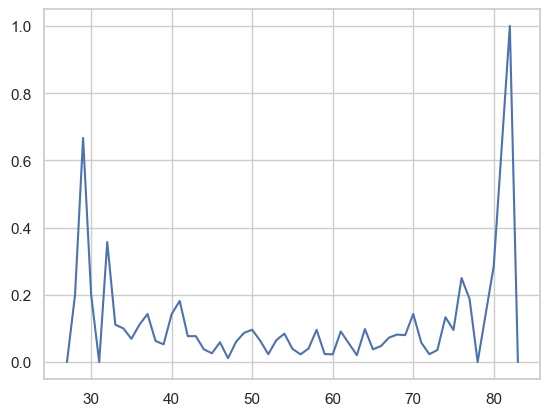

In [279]:
plt.plot(df.groupby("age")["AcceptedCmp5"].mean()) # showing the relation between the age and the last cmp5

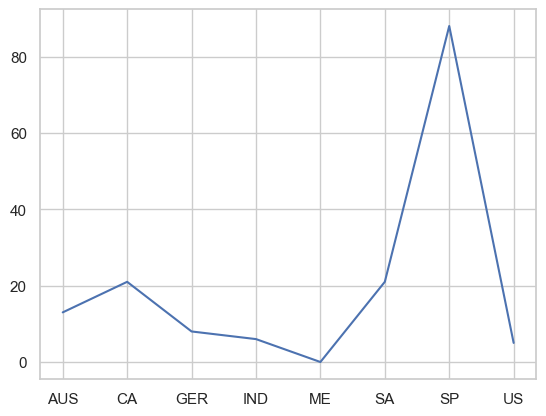

In [280]:
plt.plot(df.groupby("Country")["AcceptedCmp5"].sum())   # showing the relation between the country and the last cmp5

We see here SP is far away from all other locations in terms of accepting the campgain 5

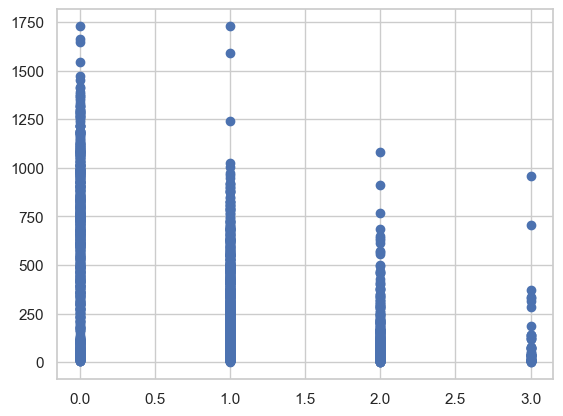

In [281]:
plt.scatter(df["totalChildern"],df["totalSpending"])    # showing the relation between the total childern for family and the total spending 

Surprisingly, singles are spending more than families. However, when we analyze the chart depicting the most frequently purchased products, it becomes evident that wine is at the top. This finding suggests that it makes sense for singles to spend more than families since families may not be as enthusiastic about wine as singles are.

In [282]:
df["Complain"].value_counts()

Complain
0    2208
1      20
Name: count, dtype: int64

In [283]:
df["Education"].value_counts()

Education
Graduation    1122
PhD            482
Master         369
2n Cycle       201
Basic           54
Name: count, dtype: int64

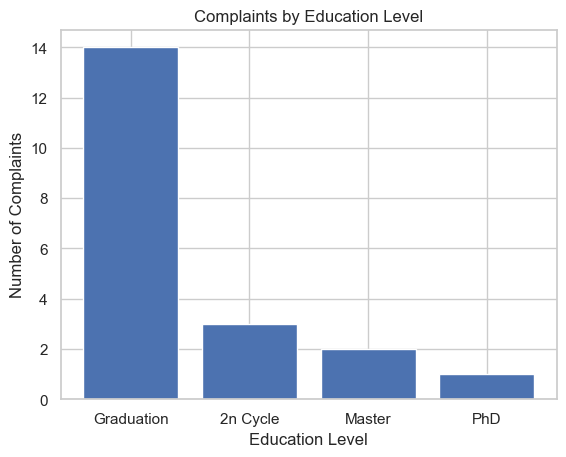

In [284]:
# Group the data by education level and count the number of complaints for each level
complaints_by_education = df[df['Complain'] == 1]['Education'].value_counts()


# Plot the bar chart
plt.bar(complaints_by_education.index, complaints_by_education)

plt.xlabel("Education Level")
plt.ylabel("Number of Complaints")
plt.title("Complaints by Education Level")

plt.show()

After the analysis done we can get out of some points which would will be helpful:
    1. Older people are as tech-savvy and they not prefer shopping in-store.
    2. Customers with kids have time to visit a store and would not prefer to shop online.
    3. Does the US fare significantly better than the rest of the world in terms of total purchases? doesn't
    4. Which products are performing the best, and which are performing the least in terms of revenue? We can say that most of the   customers are spending there money on wines, meat, Gold, Fish, Fruits & sweet as the last one.
    5. Is there any pattern between the age of customers and the last campaign acceptance rate? yes there's as we saw
    6. Which Country has the greatest number of customers who accepted the last campaign? SP was first.
    7. There's relation between the no.children and the total spending, as we saw singles were spend more than the families in Wine
    8. Education background of the customers who complained in the last 2 year